# Santiago Gonzalez de Cosio Romero

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The cartwheel dataset will be used to identify clusters automatically.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [2]:
# url string that hosts our .csv file
url = "datasets/cartwheel/cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
dataset = pd.read_csv(url)


In [3]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower_Name"]

# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
ds = pd.read_csv(url, header = None, names = colnames )

Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Flower_Name      object
dtype: object

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [4]:
print(dataset.shape)

dataset.head()


(28, 12)


,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


In [5]:
print(ds.shape)

ds.head()


(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values

In [6]:
dataset = dataset.dropna()

print(dataset.shape)


(25, 12)


In [7]:
ds = ds.dropna()

print(ds.shape)
ds.dtypes

(150, 5)


Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Flower_Name      object
dtype: object

3. Encoding the class label categorical column: from string to num


In [8]:
# Encoding the categorical column
ds = ds.replace({"Flower_Name":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
ds

# Note: this is not neesary for the cartwheel dataset, but it going to be very usefull for the Iris dataset



,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower_Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


4. Discard columns that won't be used


In [9]:
# Drop out non necesary columns
dpetal = ds.drop(['Sepal_Length', 'Sepal_Width'], axis=1)
dsepal = ds.drop(['Petal_Length', 'Petal_Width'], axis=1)

#Visualize the dataset
print(dpetal)
print(dsepal)


     Petal_Length  Petal_Width  Flower_Name
0             1.4          0.2            0
1             1.4          0.2            0
2             1.3          0.2            0
3             1.5          0.2            0
4             1.4          0.2            0
..            ...          ...          ...
145           5.2          2.3            2
146           5.0          1.9            2
147           5.2          2.0            2
148           5.4          2.3            2
149           5.1          1.8            2

[150 rows x 3 columns]
     Sepal_Length  Sepal_Width  Flower_Name
0             5.1          3.5            0
1             4.9          3.0            0
2             4.7          3.2            0
3             4.6          3.1            0
4             5.0          3.6            0
..            ...          ...          ...
145           6.7          3.0            2
146           6.3          2.5            2
147           6.5          3.0            2
148     

5. Scatter plot of the data

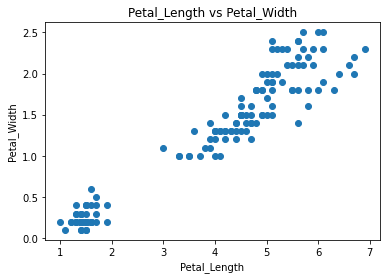

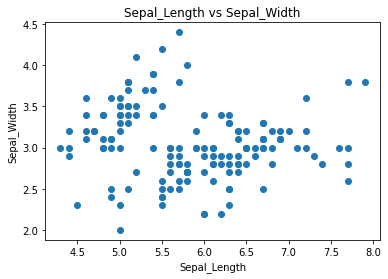

In [29]:
plt.scatter(dpetal.Petal_Length,dpetal.Petal_Width)
plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.show()

plt.scatter(dsepal.Sepal_Length,dsepal.Sepal_Width)
plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.show()



6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

<ipython-input-11-5bec813ff61a>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-setosa')
<ipython-input-11-5bec813ff61a>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-versicolor')
<ipython-input-11-5bec813ff61a>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-virginica')


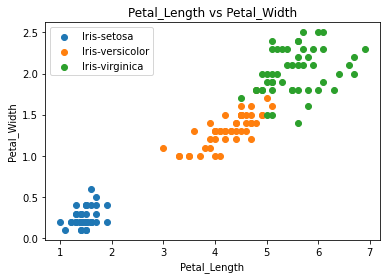

In [11]:
df1 = dpetal[dpetal.Flower_Name==0]
df2 = dpetal[dpetal.Flower_Name==1]
df3 = dpetal[dpetal.Flower_Name==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-setosa')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-versicolor')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-virginica')

plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()


<ipython-input-30-737398d390a8>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-setosa')
<ipython-input-30-737398d390a8>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-versicolor')
<ipython-input-30-737398d390a8>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-virginica')


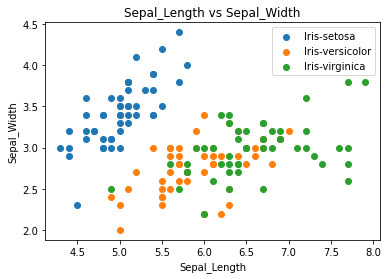

In [30]:
df1 = dsepal[dsepal.Flower_Name==0]
df2 = dsepal[dsepal.Flower_Name==1]
df3 = dsepal[dsepal.Flower_Name==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-setosa')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-versicolor')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-virginica')

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

So, for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [37]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
kmp = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
ypetal = kmp.fit_predict(dpetal[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataser
ypetal


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
kms = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
ysepal = kms.fit_predict(dsepal[['Sepal_Length','Sepal_Width']])

# Print estimated cluster of each point in the dataser
ysepal

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [39]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(ds[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])

# Print estimated cluster of each point in the dataser
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [40]:
# Add a new column to the dataset with the cluster information
dpetal['Clusters'] = ypetal
dsepal['Clusters'] = ysepal
ds['Clusters'] = yp

# Visualize the dataset
print(dpetal)
print(dsepal)
print(ds)


     Petal_Length  Petal_Width  Flower_Name  Clusters
0             1.4          0.2            0         0
1             1.4          0.2            0         0
2             1.3          0.2            0         0
3             1.5          0.2            0         0
4             1.4          0.2            0         0
..            ...          ...          ...       ...
145           5.2          2.3            2         1
146           5.0          1.9            2         1
147           5.2          2.0            2         1
148           5.4          2.3            2         1
149           5.1          1.8            2         1

[150 rows x 4 columns]
     Sepal_Length  Sepal_Width  Flower_Name  Clusters
0             5.1          3.5            0         2
1             4.9          3.0            0         2
2             4.7          3.2            0         2
3             4.6          3.1            0         2
4             5.0          3.6            0         2
..  

In [42]:
# Visualize the ID of the clusters
print(dpetal.Clusters.unique())
print(dsepal.Clusters.unique())
print(ds.Clusters.unique())


[0 2 1]
[2 1 0]
[0 1 2]


In [45]:
# Center of each cluster
kmp.cluster_centers_


array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [46]:
kms.cluster_centers_

array([[5.77358491, 2.69245283],
       [6.81276596, 3.07446809],
       [5.006     , 3.428     ]])

In [47]:
km.cluster_centers_

array([[1.462     , 0.246     , 5.006     , 3.428     ],
       [4.39354839, 1.43387097, 5.9016129 , 2.7483871 ],
       [5.74210526, 2.07105263, 6.85      , 3.07368421]])

In [48]:
# Sum of squared error
kmp.inertia_


31.371358974358966

In [49]:
kms.inertia_

37.0507021276596

In [50]:
km.inertia_

78.851441426146

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

<ipython-input-51-7531813ea3eb>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Estimated Iris-setosa')
<ipython-input-51-7531813ea3eb>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Estimated Iris-versicolor')
<ipython-input-51-7531813ea3eb>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Estimated Iris-virginica')


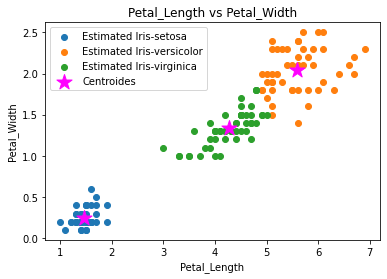

In [51]:
df1 = dpetal[dpetal.Clusters==0]
df2 = dpetal[dpetal.Clusters==1]
df3 = dpetal[dpetal.Clusters==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Estimated Iris-setosa')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Estimated Iris-versicolor')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Estimated Iris-virginica')

plt.scatter(kmp.cluster_centers_[:,0], kmp.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

<ipython-input-52-b43c60132471>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Estimated Iris-setosa')
<ipython-input-52-b43c60132471>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Estimated Iris-versicolor')
<ipython-input-52-b43c60132471>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Iris-virginica')


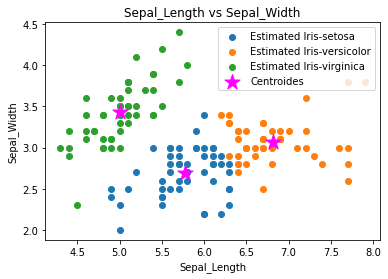

In [52]:
df1 = dsepal[dsepal.Clusters==0]
df2 = dsepal[dsepal.Clusters==1]
df3 = dsepal[dsepal.Clusters==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Estimated Iris-setosa')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Estimated Iris-versicolor')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Estimated Iris-virginica')

plt.scatter(kms.cluster_centers_[:,0], kms.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

Plot real clusters and visual comparison

<ipython-input-53-33f8f24f0fa8>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-setosa')
<ipython-input-53-33f8f24f0fa8>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-versicolor')
<ipython-input-53-33f8f24f0fa8>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-virginica')


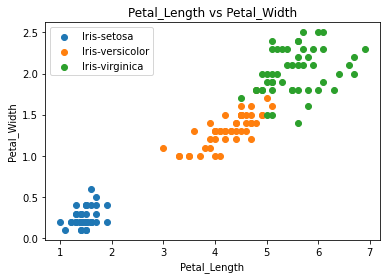

In [53]:
df1 = dpetal[dpetal.Flower_Name==0]
df2 = dpetal[dpetal.Flower_Name==1]
df3 = dpetal[dpetal.Flower_Name==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Iris-setosa')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Iris-versicolor')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Iris-virginica')


plt.title('Petal_Length vs Petal_Width')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()


<ipython-input-54-d5830d5cb9bf>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-setosa')
<ipython-input-54-d5830d5cb9bf>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-versicolor')
<ipython-input-54-d5830d5cb9bf>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-virginica')


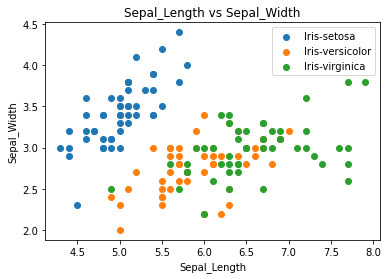

In [54]:
df1 = dsepal[dsepal.Flower_Name==0]
df2 = dsepal[dsepal.Flower_Name==1]
df3 = dsepal[dsepal.Flower_Name==2]

plt.scatter(df1.Sepal_Length, df1.Sepal_Width, Label='Iris-setosa')
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, Label='Iris-versicolor')
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, Label='Iris-virginica')


plt.title('Sepal_Length vs Sepal_Width')
plt.xlabel('Sepal_Length')
plt.ylabel('Sepal_Width')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [75]:
sseP = []
k_rngPetal = range(1,10)
for k in k_rngPetal:
    kmp = KMeans(n_clusters=k)
    kmp.fit_predict(dpetal[['Petal_Length','Petal_Width']])
    sseP.append(kmp.inertia_)
    

In [77]:
sseS = []
k_rngSepal = range(1,10)
for k in k_rngSepal:
    kms = KMeans(n_clusters=k)
    kms.fit_predict(dsepal[['Sepal_Length','Sepal_Width']])
    sseS.append(kms.inertia_)

In [72]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(ds[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])
    sse.append(km.inertia_)

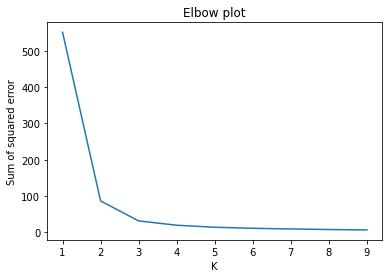

In [76]:
plt.plot(k_rngPetal,sseP)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

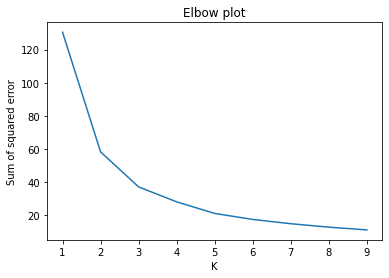

In [78]:
plt.plot(k_rngSepal,sseS)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

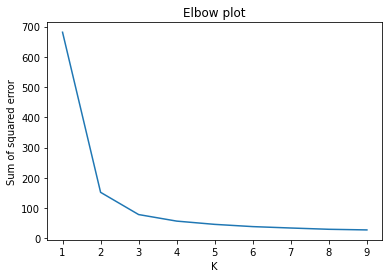

In [79]:
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

According to the Elbot plot, the selected K agree with the real number of clusters



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: work with the iris dataset

 - For the following cases, do Kmean and without using min max scaling: determine whether the scaling benefits or not
 
 - Also, compute and show the elbow plot
    
1. Do clustering with the iris flower dataset to form clusters using as features petal width and length. Drop out the other two features (sepal width and length) for simplicity.
Hecho

2. Do clustering with the iris flower dataset to form clusters using as features sepal width and length. Drop out the other two features (petal width and length) for simplicity.
Hecho

3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible
Hecho



5. Draw conclusiones:
    - About the elbow plot: does the K agree with the real number of clusters?
    
    Si lo hace, ya que hace referencia a que la mejor cantidad de clusters para agrupar los diferentes objetos son de 3. Como lo calculamos previamente con los scatterplots, podemos ver que efectivamente 3 clusters son necesarios. 
    
    
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?
    
    El grupo que mejor representa la separación evidente de los tres tipos de flores son los aspectos del pétalo, se puede observar en el scatterplot sin la creación de los clusters, consecuentemente, al incluir los aspectos de sépalo, aunque no existe un scatterplot con los 4 aspectos, se puede concluir que existiría mayor caos y dificultad para la agrupación en los diversos clusters. 
   